From the example: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

In [2]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

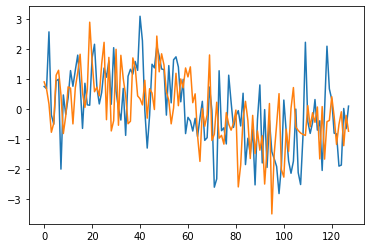

In [10]:
x = np.arange(128) / 128

PIT = 1
Fs = 10e3  # Sampling Freq
Freq = 5  # Jammer Freq
NumSamples = PIT * Fs  # Number of samples to process
# t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
sig1 = np.sin(2 * np.pi * x)
sig2 = np.sin(2 * np.pi * x + 0.05*np.pi)
# sig = 1 * np.exp(2j * np.pi * Freq * t)

sig1_noise = sig1 + np.random.randn(len(sig1))
sig2_noise = sig2 + np.random.randn(len(sig2))

plt.plot(sig1_noise.real)
plt.plot(sig2_noise.real)

In [11]:
corr = signal.correlate(sig1_noise, sig2_noise)

# lags = signal.correlation_lags(len(sig), len(sig_noise))

corr /= np.max(corr)

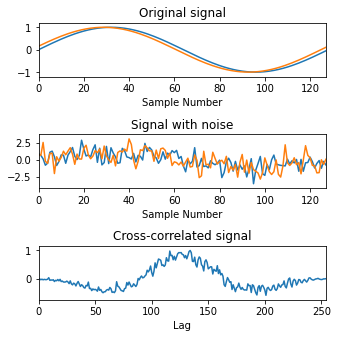

In [12]:

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))

ax_orig.plot(sig1)
ax_orig.plot(sig2)

ax_orig.set_title('Original signal')

ax_orig.set_xlabel('Sample Number')

ax_noise.plot(sig2_noise)
ax_noise.plot(sig1_noise)

ax_noise.set_title('Signal with noise')

ax_noise.set_xlabel('Sample Number')

ax_corr.plot(corr)

ax_corr.set_title('Cross-correlated signal')

ax_corr.set_xlabel('Lag')

ax_orig.margins(0, 0.1)

ax_noise.margins(0, 0.1)

ax_corr.margins(0, 0.1)

fig.tight_layout()

plt.show()